Import all important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

open file 

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


# Data preprocessing part 1

In [3]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [5]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
#check the number of unique value an object datatype
df.select_dtypes(include='object').nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

In [7]:
df.shape

(614, 12)

In [8]:
df1 = df.dropna()

In [9]:
df1.shape

(499, 12)

In [10]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


# Exploratory Data Analysis

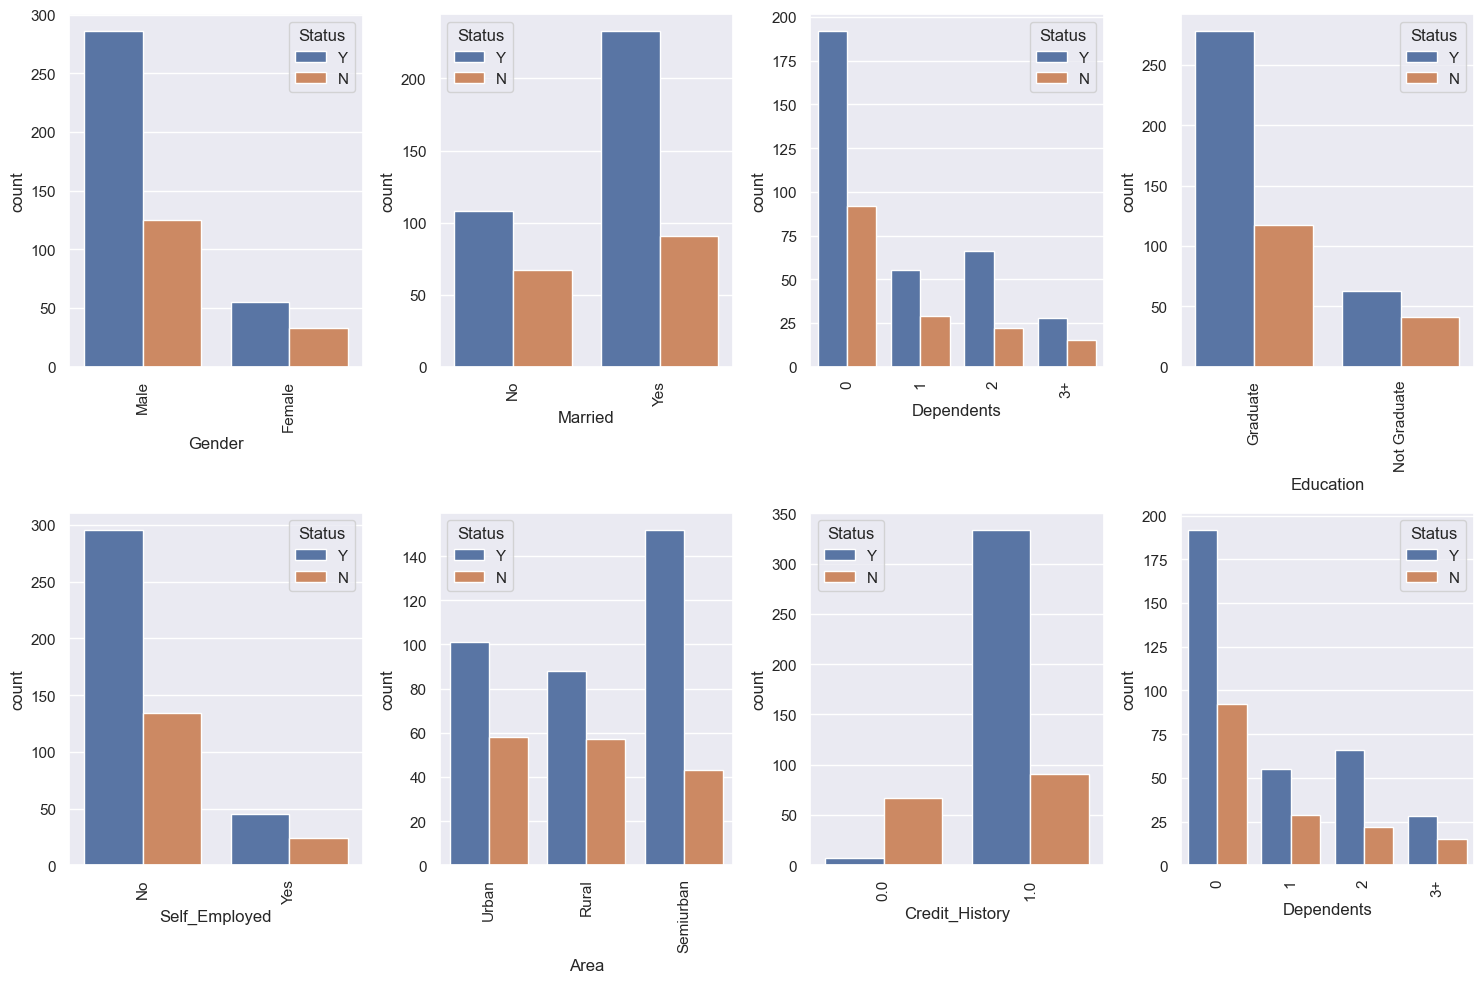

In [11]:
#list of categorical variable to plot
cat_vars =['Gender','Married', 'Dependents','Education', 'Self_Employed','Area', 'Credit_History','Dependents']

# create figure with subplots
fig, axs =plt.subplots(nrows=2, ncols=4, figsize=(15,10))
axs = axs.flatten()

#create barplot for each  categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Status', data=df1, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
#adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

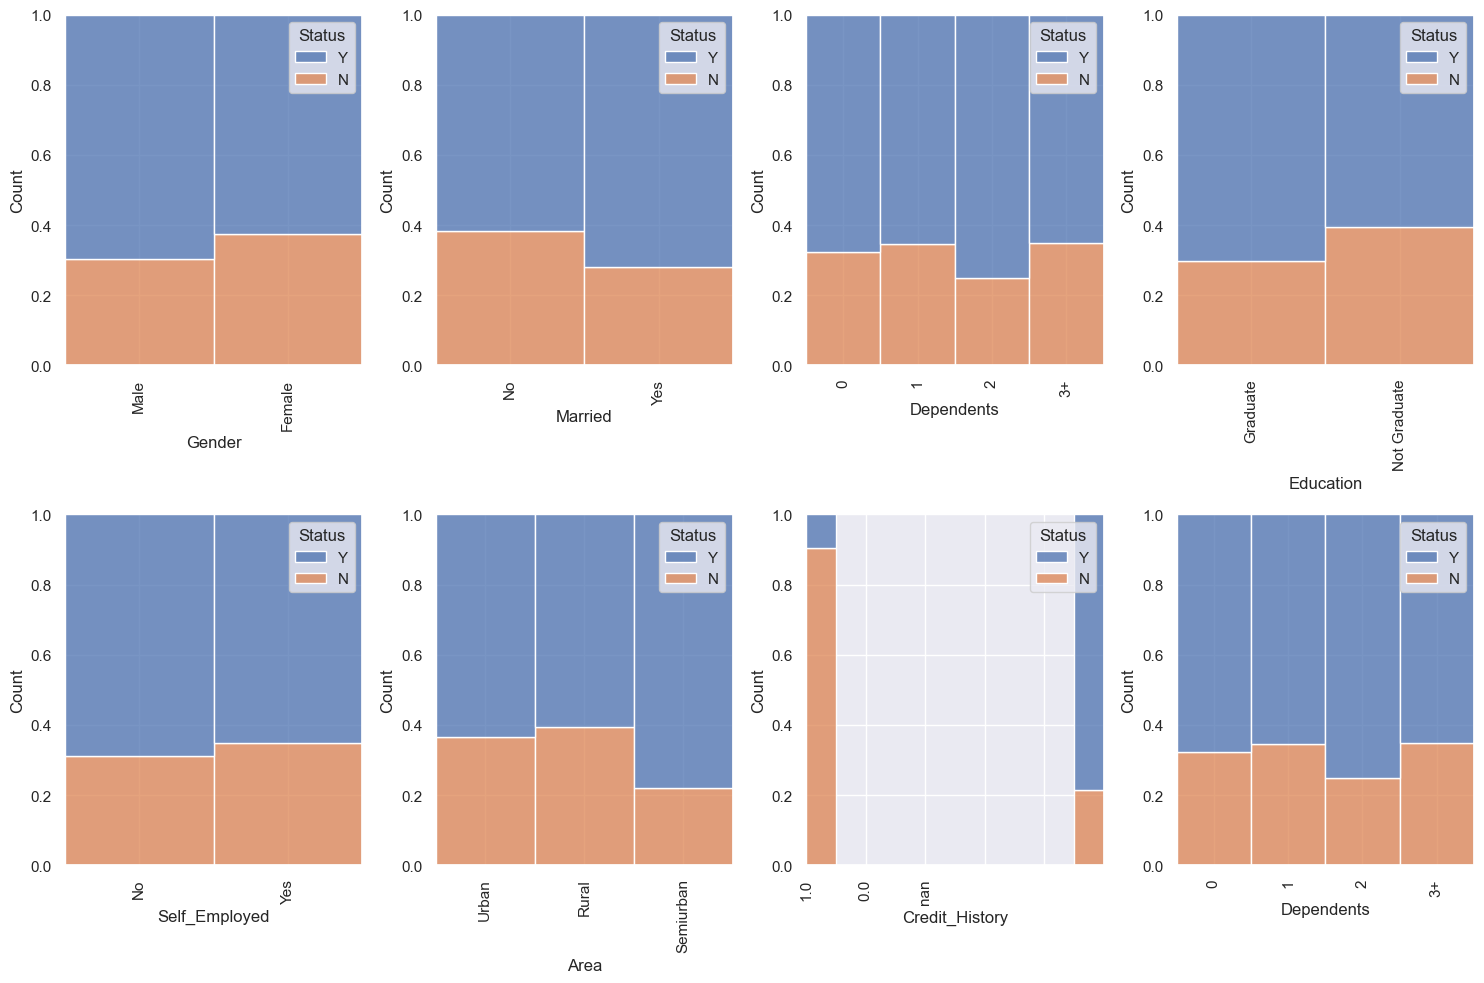

In [12]:
import warnings 
warnings.filterwarnings("ignore")
#list of categorical variable to plot
cat_vars =['Gender','Married', 'Dependents','Education', 'Self_Employed','Area', 'Credit_History','Dependents']

# create figure with subplots
fig, axs =plt.subplots(nrows=2, ncols=4, figsize=(15,10))
axs = axs.flatten()

#create barplot for each  categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Status', data=df1, ax=axs[i], multiple="fill", kde =False)
    axs[i].set_xticklabels(df[var].unique(),rotation =90)
    axs[i].set_xlabel(var)
                 
#adjust spacing between subplots
fig.tight_layout()
                 
#show plot
plt.show()

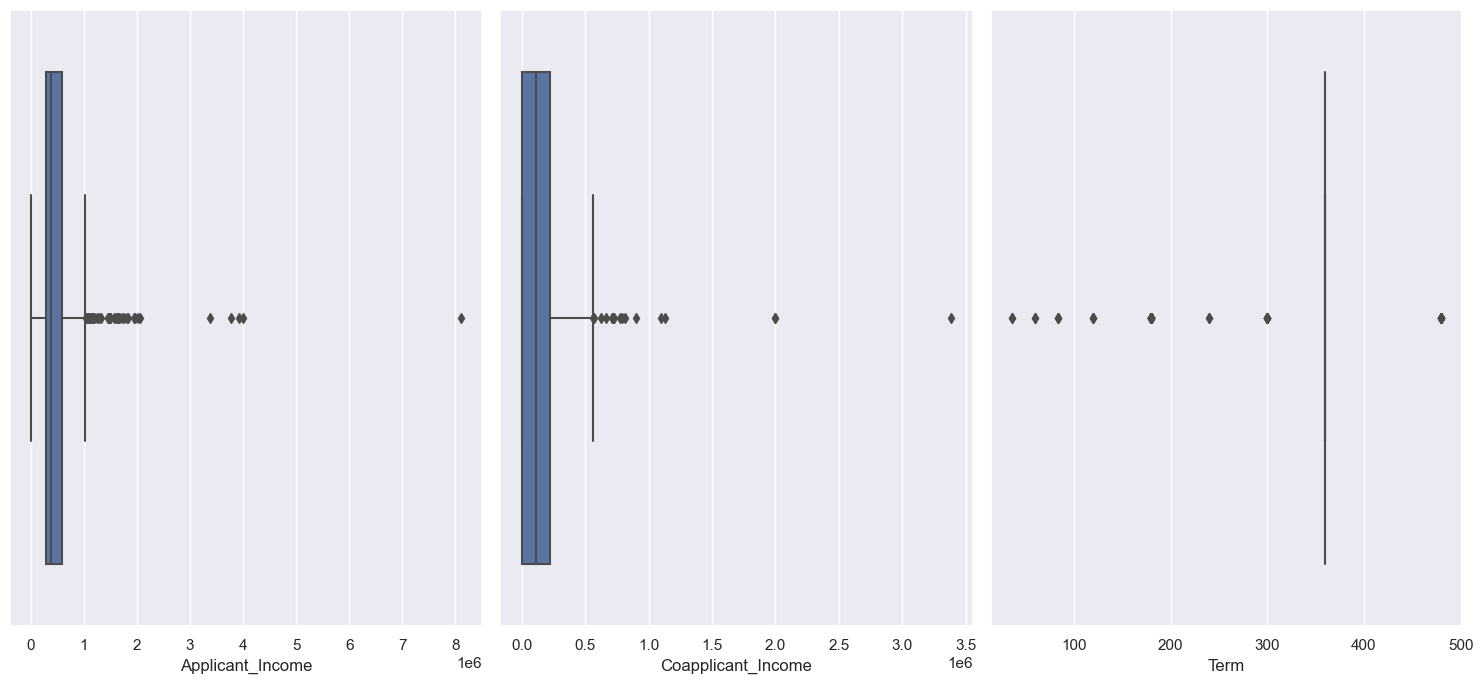

In [13]:
num_vars = ['Applicant_Income','Coapplicant_Income','Term']

fig, axs= plt.subplots(nrows=1, ncols=3, figsize=(15,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df1, ax=axs[i])

fig.tight_layout()

plt.show()

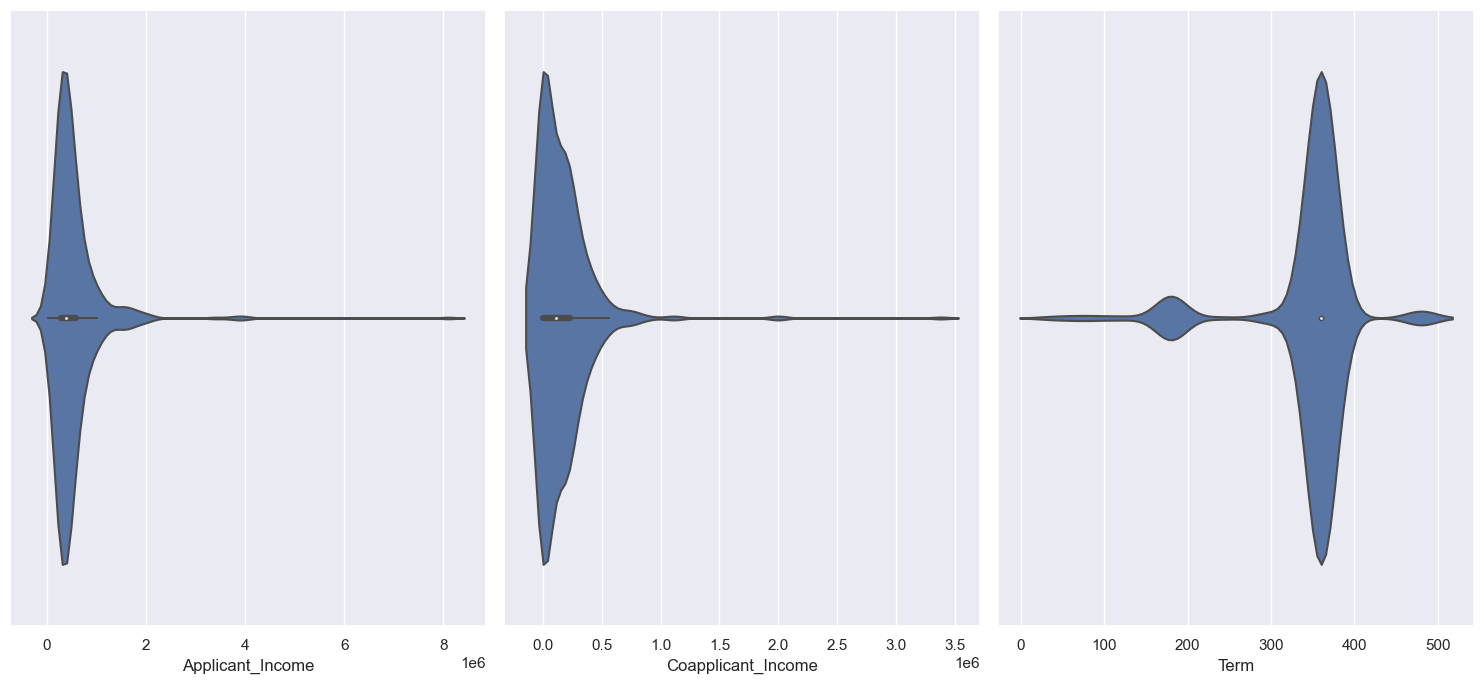

In [14]:
num_vars = ['Applicant_Income','Coapplicant_Income','Term']

fig, axs= plt.subplots(nrows=1, ncols=3, figsize=(15,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df1, ax=axs[i])

fig.tight_layout()

plt.show()

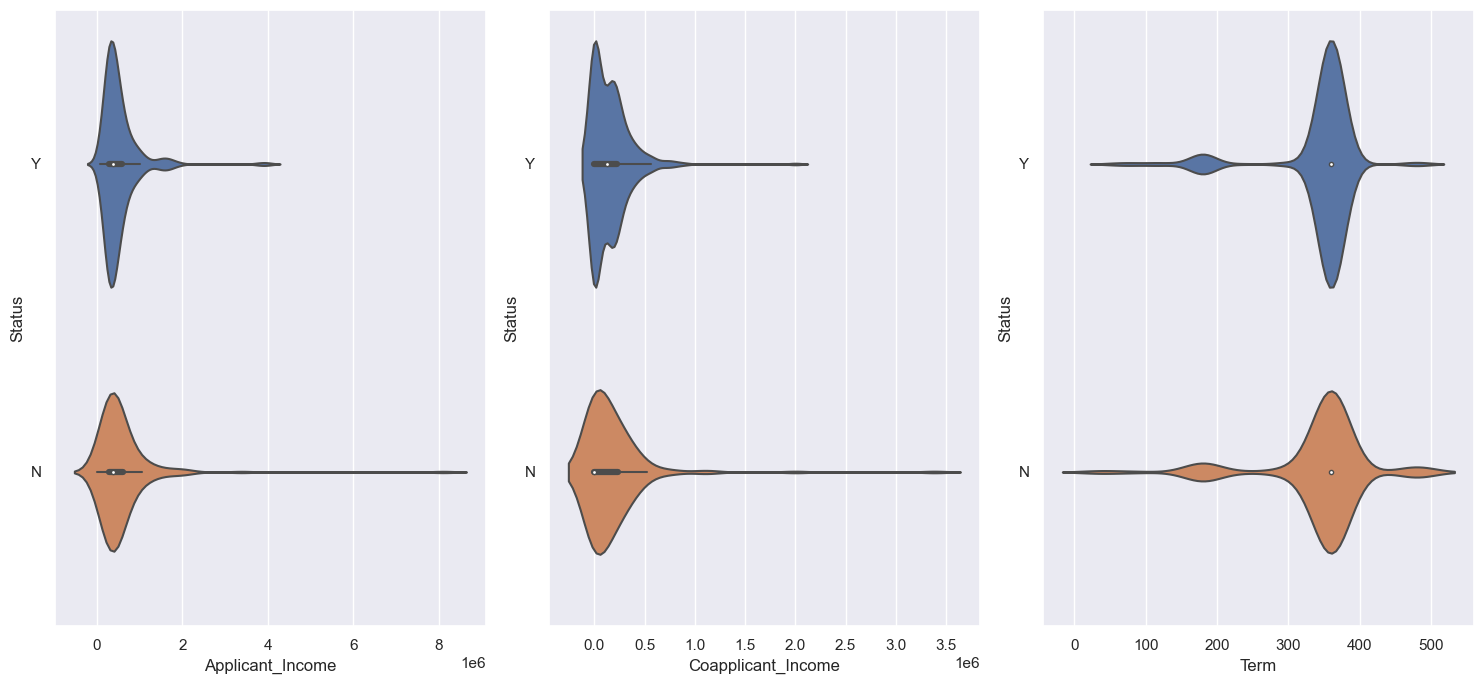

In [15]:
num_vars = ['Applicant_Income','Coapplicant_Income','Term']

fig, axs= plt.subplots(nrows=1, ncols=3, figsize=(15,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y='Status', data=df1, ax=axs[i])

fig.tight_layout()

plt.show()

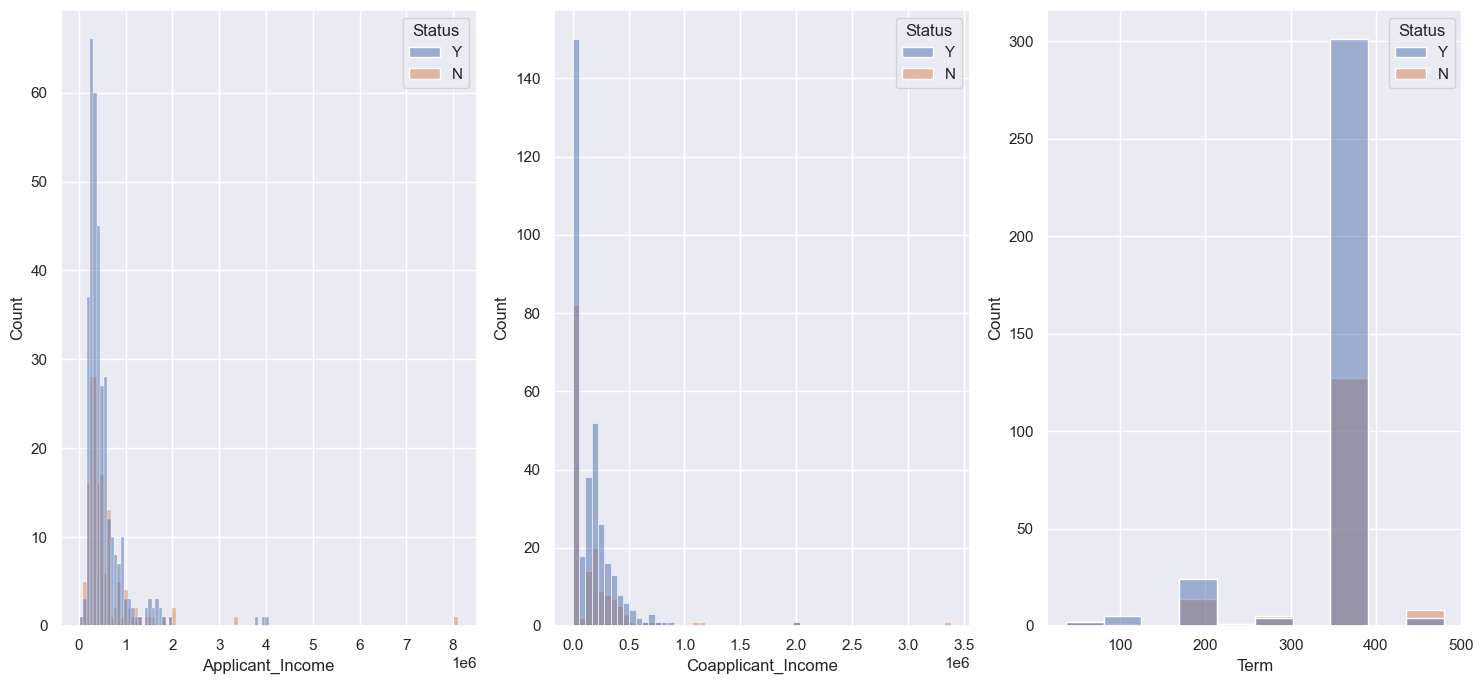

In [16]:
num_vars = ['Applicant_Income','Coapplicant_Income','Term']

fig, axs= plt.subplots(nrows=1, ncols=3, figsize=(15,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var,  data=df1, hue='Status',ax=axs[i])

fig.tight_layout()

plt.show()

# Data Preprocessing Part 2

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,6,1,2,1
1,1,2,1,0,0,458300,150800.0,12800000,6,1,0,0
2,1,2,0,0,2,300000,0.0,6600000,6,1,2,1
3,1,2,0,1,0,258300,235800.0,12000000,6,1,2,1
4,1,0,0,0,0,600000,0.0,14100000,6,1,2,1


In [39]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [40]:
# Fill null values with 'Unknown'
df.fillna('Unknown', inplace=True)

#Check the missing value again
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [17]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

# Label Encoding for Object datatype 

In [19]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' 'Unknown']
Married: ['No' 'Yes' 'Unknown']
Dependents: ['0' '1' '2' '3+' 'Unknown']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' 'Unknown']
Term: [360.0 120.0 240.0 'Unknown' 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History: [1.0 0.0 'Unknown']
Area: ['Urban' 'Rural' 'Semiurban']
Status: ['Y' 'N']


In [20]:
# CONVERT sselected columns to string datatype
df[['Term','Credit_History']] = df[['Term','Credit_History']].astype(str)

In [21]:
from sklearn import preprocessing 

# loop over each column in the dataframe where dtype is' object'
for col in df.select_dtypes (include=['object']).columns:
    
    #Insitialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    #fit the encoder to the unqiue value in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encode 
    df[col]=label_encoder.transform(df[col])
    
    #print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0 2]
Married: [0 2 1]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 2 1]
Term: [ 6  1  3 10  2  8  4  7  5  9  0]
Credit_History: [1 0 2]
Area: [2 0 1]
Status: [1 0]


# Check if the Label 'Status' is balanced or not

1    422
0    192
Name: Status, dtype: int64

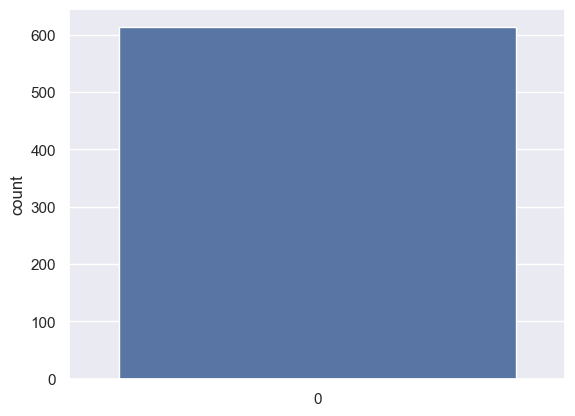

In [43]:
sns.countplot(df['Status'])
df['Status'].value_counts()

In [26]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class

df_majority = df[(df['Status']==1)]
df_minority = df[(df['Status']==0)]
# upsample minority class

df_minority_upsampled = resample(df_minority, 
                                replace=True,# sample with replacment
                                n_samples = 422, #to match majority class
                                random_state=0) #reproducible results

#combine majority class with unsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    422
1    422
Name: Status, dtype: int64

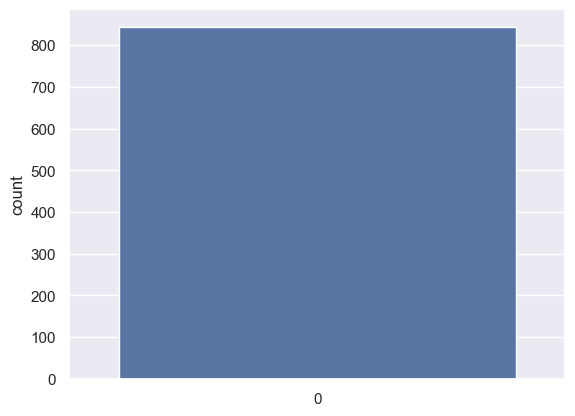

In [31]:
sns.countplot(df_upsampled['Status'])
df_upsampled['Status'].value_counts()

# remove Outiler using IQR because there are a lot of extreme value

In [32]:
df_upsampled.shape

(844, 12)

In [37]:
#specify the columns to remove outliers from dataframe

column_names= ['Applicant_Income','Coapplicant_Income','Term']

#remove outilers for each selected column using the IQR method 

for column_name in column_names:
    Q1 = df_upsampled[column_name].quantile(0.25)
    Q3 = df_upsampled[column_name].quantile(0.75)
    IQR = Q3-Q1
    df_upsampled = df_upsampled[~((df_upsampled[column_name]< (Q1 - 1.5*IQR)) | (df_upsampled[column_name] > (Q3 + 1.5 * IQR)))]
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
148,0,0,0,0,0,1000000,166600.0,22500000,6,1,0,0
338,0,0,3,1,0,183000,0.0,0,6,0,2,0
24,1,2,1,0,1,371700,292500.0,15100000,6,2,1,0
57,1,2,0,0,0,336600,220000.0,13500000,6,1,0,0
107,1,0,0,1,1,733300,0.0,12000000,6,1,0,0


In [45]:
df_upsampled.shape

(614, 12)

<Axes: >

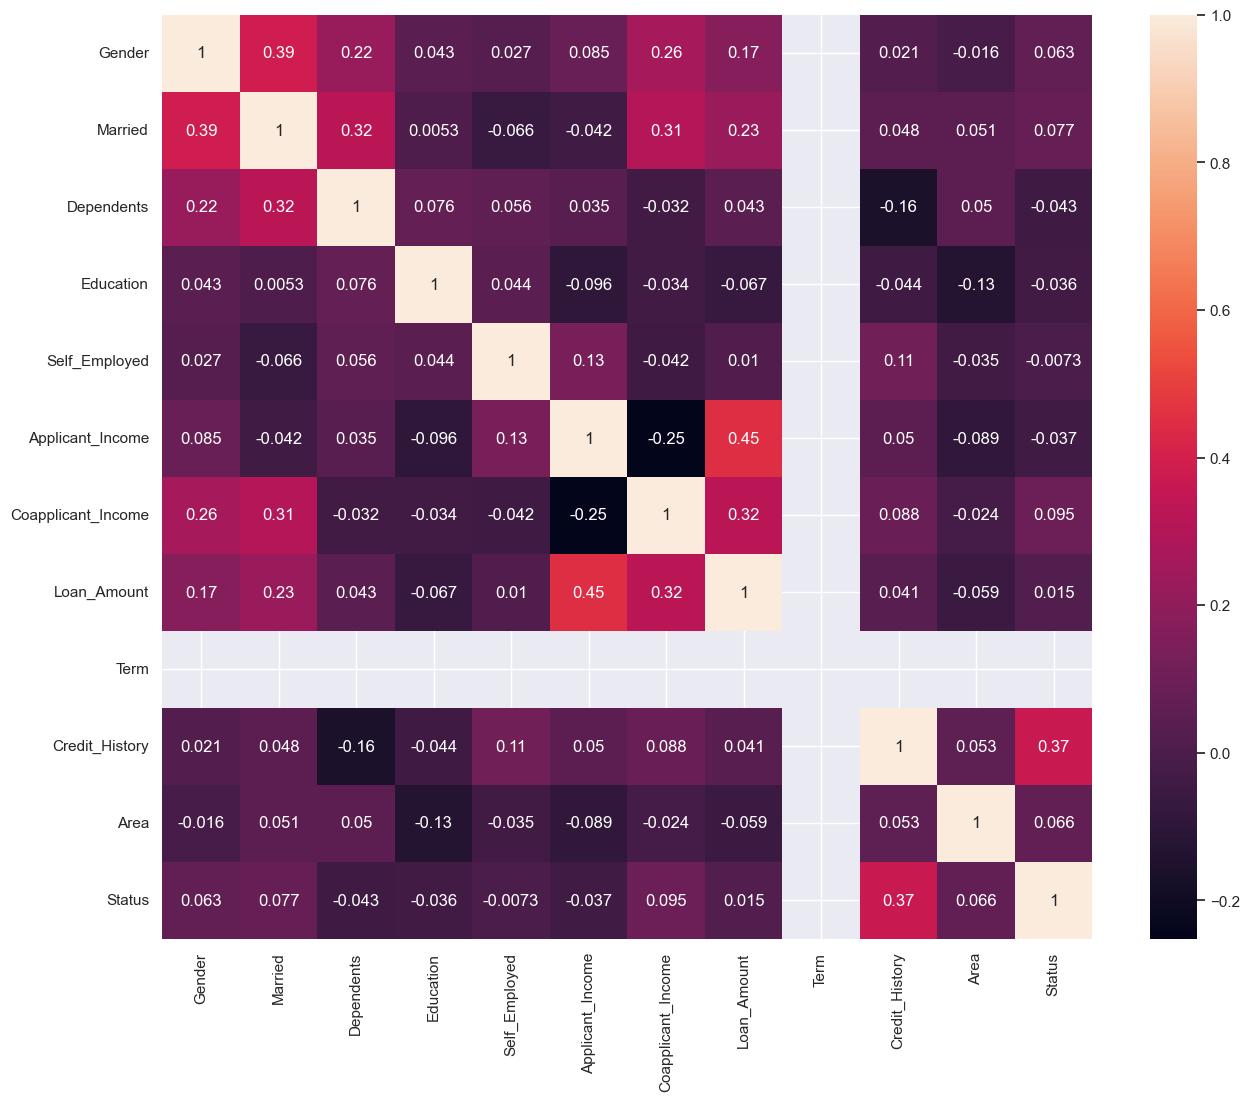

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(df_upsampled.corr(), fmt='.2g', annot=True)

# drop column term

In [47]:
df_upsampled.drop(columns='Term', inplace=True)

In [48]:
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Area,Status
148,0,0,0,0,0,1000000,166600.0,22500000,1,0,0
338,0,0,3,1,0,183000,0.0,0,0,2,0
24,1,2,1,0,1,371700,292500.0,15100000,2,1,0
57,1,2,0,0,0,336600,220000.0,13500000,1,0,0
107,1,0,0,1,1,733300,0.0,12000000,1,0,0


# Train Test Split

In [49]:
X = df_upsampled.drop('Status', axis=1)
y = df_upsampled['Status']

In [57]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Area
148,0,0,0,0,0,1000000,166600.0,22500000,1,0
338,0,0,3,1,0,183000,0.0,0,0,2
24,1,2,1,0,1,371700,292500.0,15100000,2,1
57,1,2,0,0,0,336600,220000.0,13500000,1,0
107,1,0,0,1,1,733300,0.0,12000000,1,0


In [58]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [60]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [61]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.18 %


In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.861788617886179
Precision Score :  0.8617886178861789
Recall Score :  0.8617886178861789
Jaccard Score :  0.7571428571428571
Log Loss :  4.9816431513413955


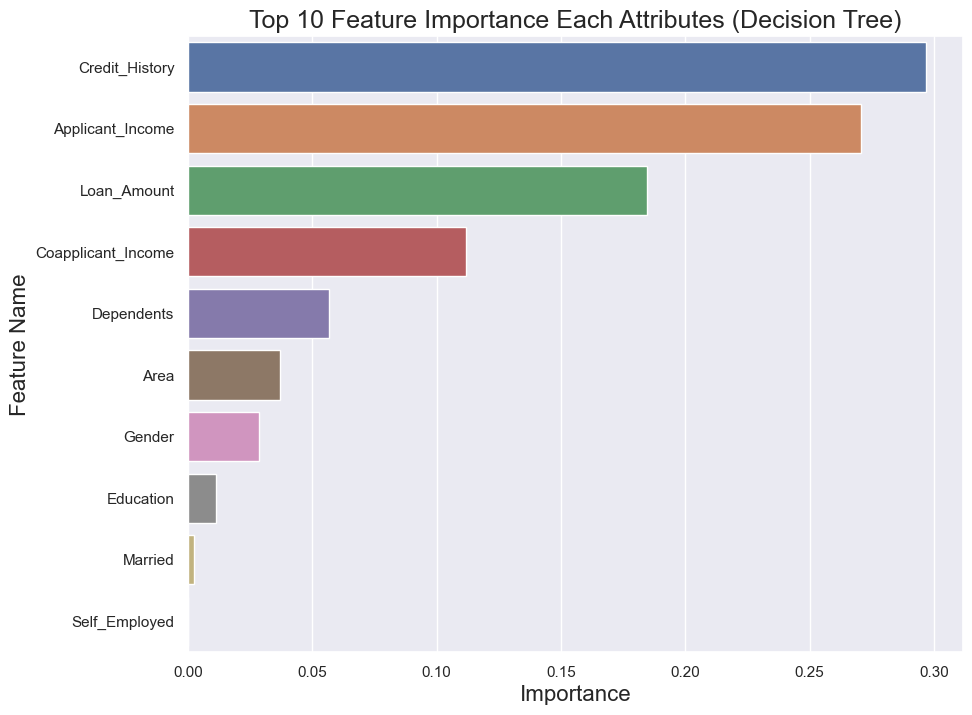

In [63]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [70]:
pip install shapely

In [72]:
pip install shap 


     ------------------------------------- 462.3/462.3 kB 84.6 kB/s eta 0:00:00


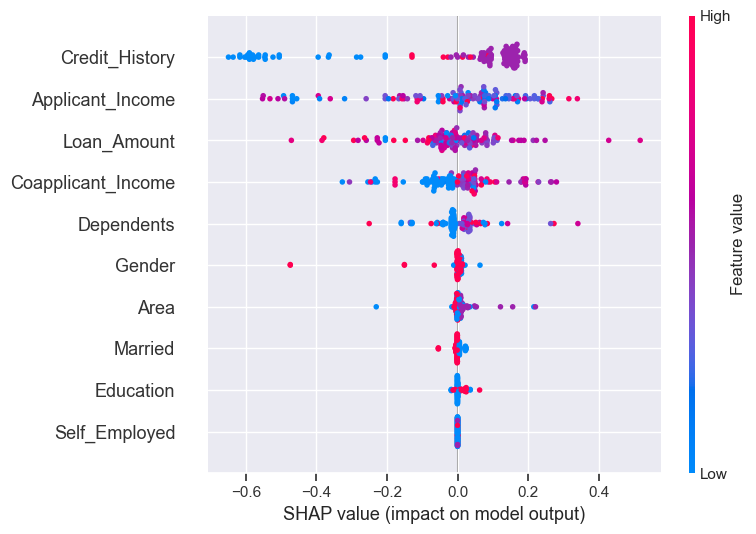

In [73]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

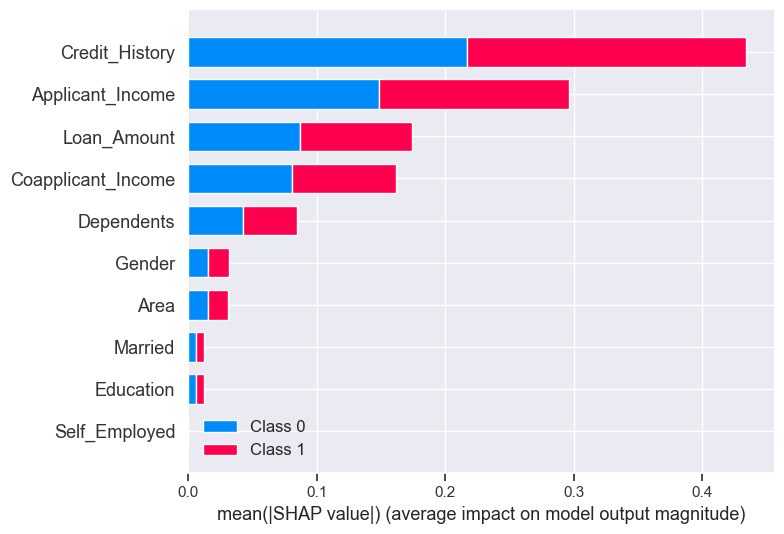

In [74]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8617886178861789')

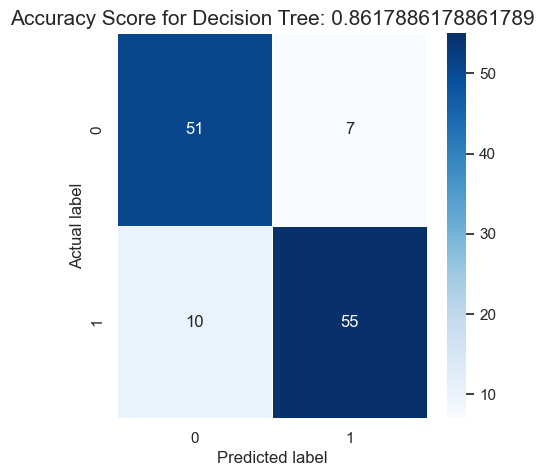

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

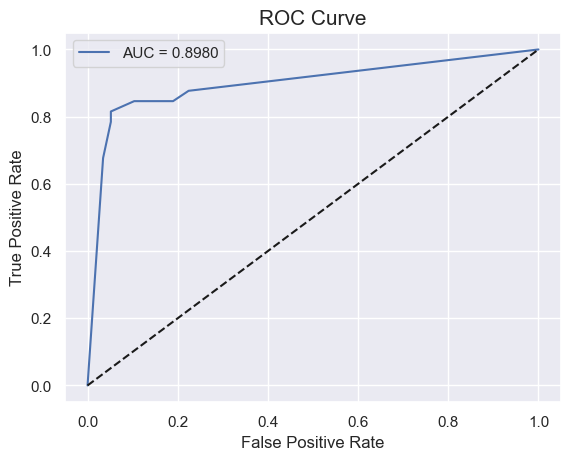

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=0)

In [88]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 95.12 %


In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.861788617886179
Precision Score :  0.8617886178861789
Recall Score :  0.8617886178861789
Jaccard Score :  0.7571428571428571
Log Loss :  4.9816431513413955


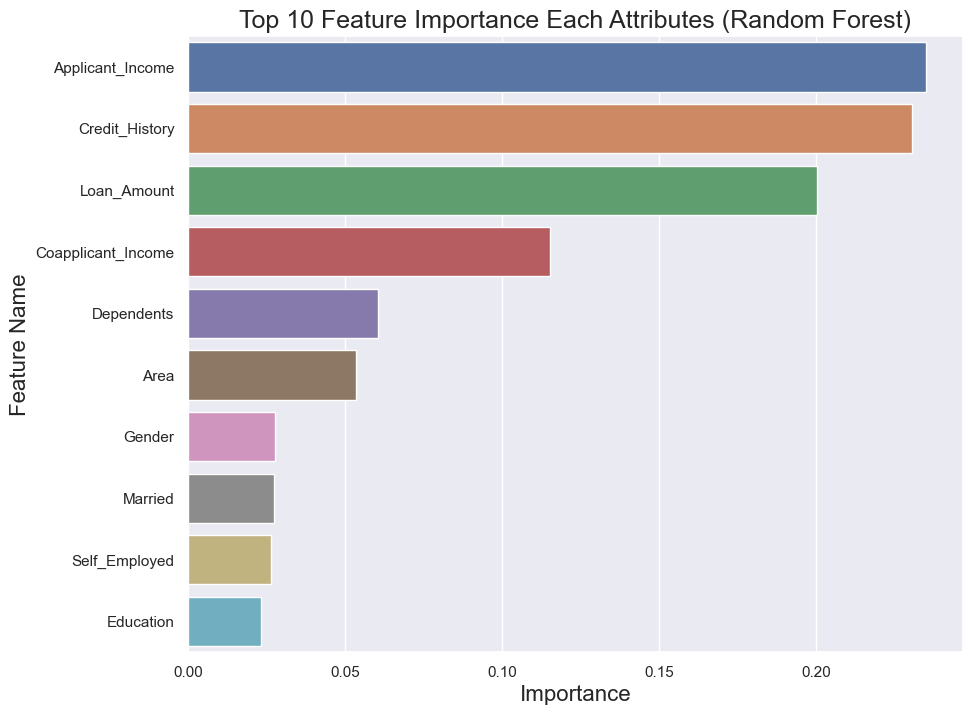

In [89]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

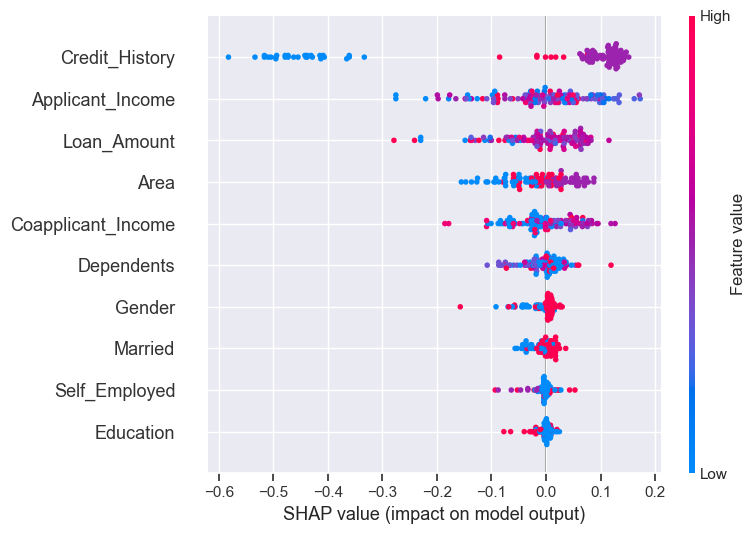

In [90]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

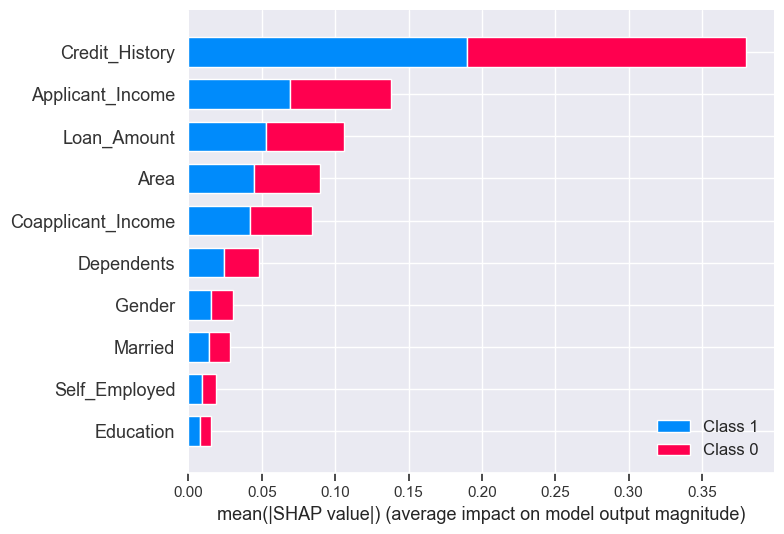

In [91]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9512195121951219')

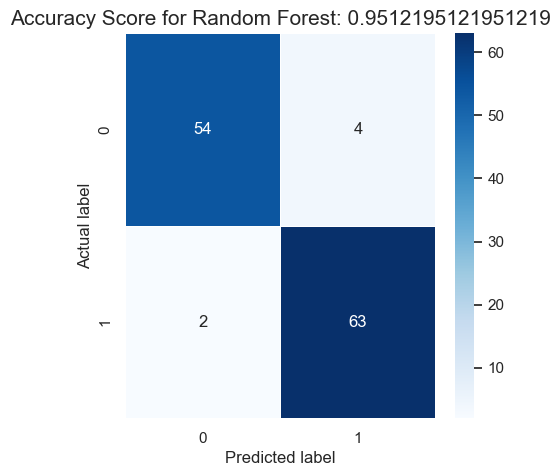

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

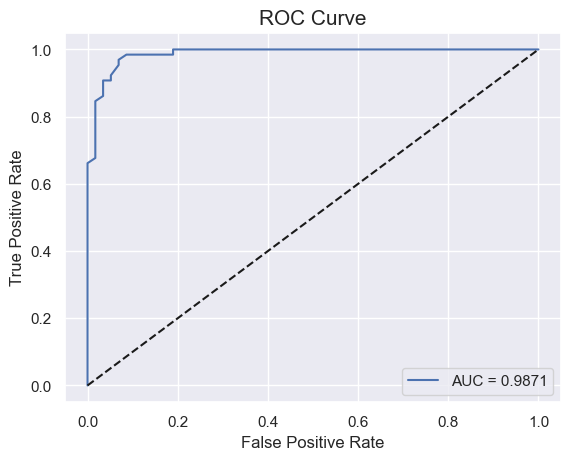

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()